# Global Exploratory Data Analysis
## Amazon Reviews - ABSA Project

This notebook performs exploratory data analysis on the Amazon reviews dataset.

In [2]:
DATA_PATH = "../data/raw/Amazon_Unlocked_Mobile.csv"
MAX_REVIEWS = 10000   # fast EDA


In [3]:
import pandas as pd


df = pd.read_csv(DATA_PATH)

print("Original shape:", df.shape)

# Limit for fast EDA
df = df.head(MAX_REVIEWS)

print("EDA shape:", df.shape)
df.head()


Original shape: (413840, 6)
EDA shape: (10000, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  10000 non-null  object 
 1   Brand Name    7473 non-null   object 
 2   Price         9307 non-null   float64
 3   Rating        10000 non-null  int64  
 4   Reviews       9999 non-null   object 
 5   Review Votes  9676 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


I verified data types and missing values before modeling

In [5]:
df.isnull().sum()


Product Name       0
Brand Name      2527
Price            693
Rating             0
Reviews            1
Review Votes     324
dtype: int64

In [6]:
df = df.dropna(subset=["Reviews"])
df["Brand Name"] = df["Brand Name"].fillna("Unknown")


In [7]:
df["Price"] = df["Price"].fillna(df["Price"].median())


In [8]:
df["Review Votes"] = df["Review Votes"].fillna(0)


In [9]:
df.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [10]:
print("After dropping missing reviews:", df.shape)

After dropping missing reviews: (9999, 6)


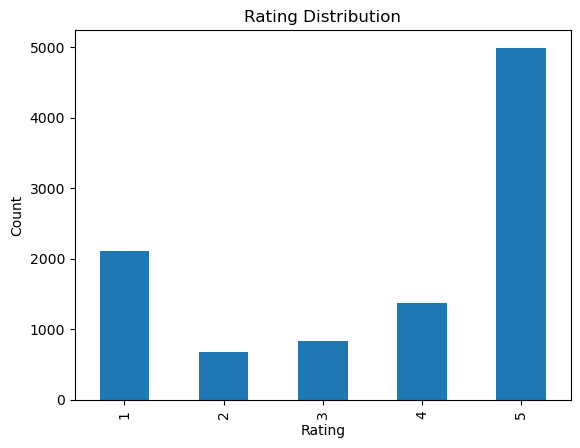

In [11]:
import matplotlib.pyplot as plt

df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


“Even though ratings skew positive, textual complaints still exist — which motivates ABSA.”

In [12]:
df["review_length"] = df["Reviews"].astype(str).apply(len)

df["review_length"].describe()


count    9999.000000
mean      226.800880
std       436.771147
min         1.000000
25%        38.000000
50%       115.000000
75%       234.000000
max      9150.000000
Name: review_length, dtype: float64

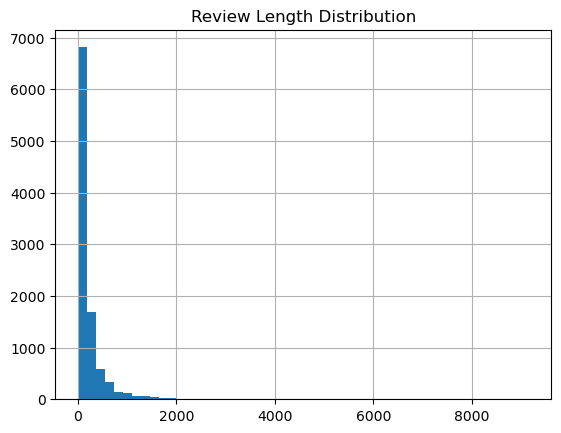

In [13]:
df["review_length"].hist(bins=50)
plt.title("Review Length Distribution")
plt.show()


In [14]:
df["Reviews"].sample(5, random_state=42).values


array(['Though the phone came packaged in a box and bubble wrapping, the upkeep of the phone was worn and scratched up.All of the open sockets had dirt in them.I was disappointed with the purchase.',
       'Bought for a teenage daughter who is extremely happy with it.',
       'Sometime get hot and battery running out quick',
       "not bad but it is old some games will freeze and I didn't get earbuds",
       "I think people that gave a one review for the iPad 3 Mini MGY92LL/A didn't read any of the information revealing the new things that make this particular iPad Mini 3 a fantastic device. This is the newest version of the Apple iPad 3 Mini with 64G. It has been updated and features one of the best retinal displays. This feature alone upgrades so many other things that will make me happier to say the least."],
      dtype=object)

In [15]:
ASPECT_KEYWORDS = {
    "battery": ["battery", "drain", "backup", "charging", "charge"],
    "camera": ["camera", "photo", "picture", "video"],
    "screen": ["screen", "display", "touch", "resolution"],
    "performance": ["performance", "speed", "lag", "slow", "fast"],
    "build": ["build", "quality", "plastic", "metal", "durable"],
    "price": ["price", "cost", "value", "worth"]
}


def count_aspects(text):
    text = str(text).lower()
    return sum(1 for a in ASPECT_KEYWORDS if a in text)

df["aspect_hits"] = df["Reviews"].apply(count_aspects)

df["aspect_hits"].describe()


count    9999.000000
mean        0.360336
std         0.776654
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: aspect_hits, dtype: float64

In [16]:
df["aspect_hits"].value_counts().sort_index().head(10)


aspect_hits
0    7584
1    1700
2     400
3     196
4      85
5      29
6       5
Name: count, dtype: int64

In [19]:
absa_df = df[df["aspect_hits"] > 0].copy()

print("Total reviews:", len(df))
print("ABSA reviews:", len(absa_df))


Total reviews: 9999
ABSA reviews: 2415


In [20]:
# Full cleaned dataset
df.to_csv(
    "../data/processed/mobile_reviews_full.csv",
    index=False
)

# ABSA-only dataset
absa_df.to_csv(
    "../data/processed/mobile_reviews_absa.csv",
    index=False
)
